In [ ]:
# analiza wina

In [6]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('winequality-red.csv', delimiter=';')

In [48]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [50]:
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)


In [51]:
# profile.to_notebook_iframe()


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


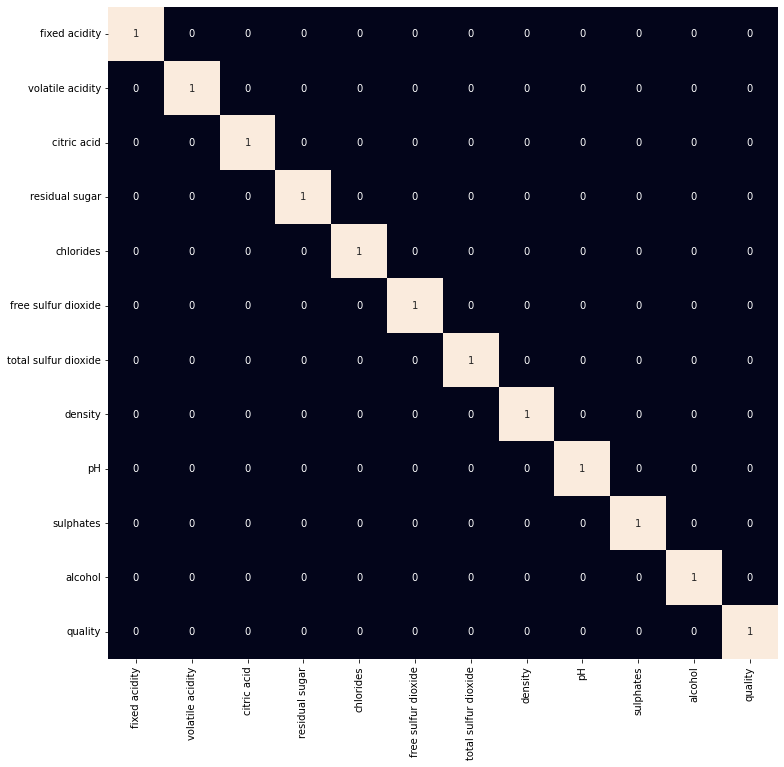

In [53]:
# szukam korelacji 
import seaborn as sb
plt.figure(figsize=(12, 12))
sb.heatmap(data.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [55]:
features = data.drop(['quality'], axis=1) 
print(features)
# cel którego szukam
target = data['quality'].apply(lambda y: 1 if y>7 else 0)
print(target)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [134]:
from sklearn.model_selection import train_test_split

# dane używane jako klasyfikator
features = data.drop(['quality'], axis=1) 
print(features)
# cel którego szukam
target = data['quality'].apply(lambda y: 1 if y>6 else 0)
print(target)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=69)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [135]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=1)

train = knn.fit(X_train, y_train)



# print('Wynik prawdziwy dla jednego rekordu: ', y_test[0])
# print('Wynik przewidywany dla jednego rekordu: ', y_one)

In [136]:
# Średnia poprawność modelu dla zestawu testowego i treningowego 
print('k-NN poprawność dla zestawu testowego: %f' % train.score(X_test, y_test))
print('k-NN poprawność dla zestawu trenigowego: %f' % train.score(X_train, y_train))

k-NN poprawność dla zestawu testowego: 0.868750
k-NN poprawność dla zestawu trenigowego: 1.000000


In [137]:
# Przewidywanie wyniku dla zestawu testującego
y_prediction = knn.predict(X_test)
# Przewidziany wynik przykładowej klasyfikacji
y_one = knn.predict(X_test[0:1])

print('Wynik prawdziwy dla jednego rekordu: ', y_test[0])
print('Wynik przewidywany dla jednego rekordu: ', y_one)


Wynik prawdziwy dla jednego rekordu:  0
Wynik przewidywany dla jednego rekordu:  [0]


In [138]:

from sklearn import metrics # biblioteka użyta do pomiaru poprawności 

# Porównanie wyniku przewidywać z testowymi prawidłowymi wynikami
print("Poprawność przewidywań: ", round(metrics.accuracy_score(y_test, y_prediction), 5))


Poprawność przewidywań:  0.86875


In [139]:
# Tworzenie tablicy pomyłek
confusion = metrics.confusion_matrix(y_test, y_prediction)
print(confusion)



[[380  22]
 [ 41  37]]


In [140]:


# Terminologia (oraz wartośći dla k = 66):
#     (True Positive)TP: 4 - poprawnie przewidziany wino dobrej jakości
#     (True Negarive)TN: 63 - poprawnie przewidziane wino gorszej jakości
#     (False Positive)FP: 0 - niepoprawnie przewidaine wino dobrej jakości
#     (False Negative)FN: 19 - niepoprawnie przewidane wino gorszej jakości 

#Podział tablicy na 4 cześci i przypisanie poszczególnych wartości 
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]



In [141]:
# Poprawność klasyfikacji, podaje procentową wartość jak często klasyfikator jest poprawny
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Wyliczona poprawność', round(classification_accuracy, 5))
print('Poprawność z funckji', round(metrics.accuracy_score(y_test, y_prediction), 5))

Wyliczona poprawność 0.86875
Poprawność z funckji 0.86875


In [142]:


# Błąd klasyfikacji, podaje procentową wartość jak często klasyfikator się myli
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Wyliczony błąd', round(classification_error, 5))
print('Błąd z funkcji', round(1 - metrics.accuracy_score(y_test, y_prediction), 5))



Wyliczony błąd 0.13125
Błąd z funkcji 0.13125


In [143]:
# Poprawa jakości algorytmu poprzez stworzenie talibcy z wynikami dla n_neighboors równych od 1 do 99
from sklearn.metrics import accuracy_score
ac = []
for i in range(1, 99):
    knn = KNeighborsClassifier(n_neighbors=i)
    train = knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    ac.append(accuracy_score(y_test, y_pred_i))

Text(0, 0.5, 'Wynik poprawności')

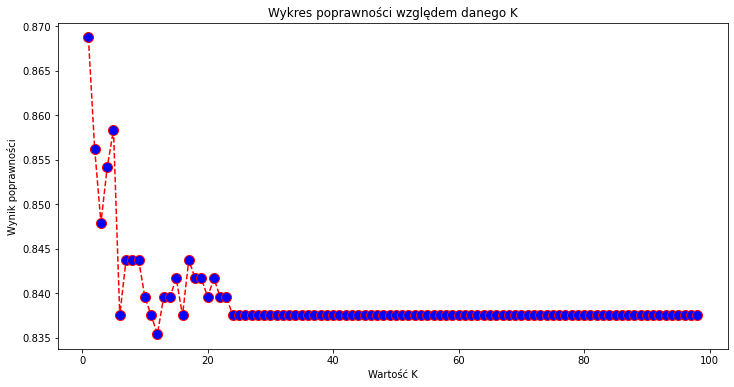

In [144]:


# Przedstawienie wyników w postaci wykresu
plt.figure(figsize=(12, 6))
plt.plot(range(1, 99), ac, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Wykres poprawności względem danego K')
plt.xlabel('Wartość K')
plt.ylabel('Wynik poprawności')



In [145]:
np.argmax(ac) + 1


1